In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

The idea behind random forest regression is ensemble learning. The basic idea is as follows:
1. From all the sample data, pick K data points
2. Train a decision tree model on the K data points
3. Choose the number of NTree and repeat the above steps NTREE-1 times
4. Make prediction with each decision tree, average the result y values

In [53]:
data = pd.read_csv('Position_Salaries.csv')

In [54]:
X = data.iloc[:, 1:2].values
y = data.iloc[:, -1:].values

In [55]:
from sklearn.ensemble import RandomForestRegressor

regressor1 = RandomForestRegressor(n_estimators=10, random_state=0)
regressor2 = RandomForestRegressor(n_estimators=300, random_state=0)


regressor1.fit(X,y)
regressor2.fit(X,y)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

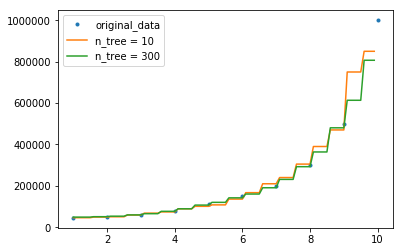

In [56]:
X_grid = np.arange(np.min(X), np.max(X), 0.1).reshape(-1,1)
plt.plot(X, y, '.', label='original_data')
plt.plot(X_grid, regressor1.predict(X_grid), label='n_tree = 10')
plt.plot(X_grid, regressor2.predict(X_grid), label='n_tree = 300')
plt.legend()

In [57]:
regressor1.predict(6.5)

array([ 167000.])

In [58]:
regressor2.predict(6.5)

array([ 160333.33333333])

In [67]:
# Define function to calcuate adjusted R squares
n = len(y)
p = 1
ss_tot = (n - 1) * y.var()
ss_res = np.sum(np.square(regressor1.predict(X).reshape(-1,1) - y))
R2 = 1 - ss_res/ss_tot
adj_R2 = 1 - (1 - R2) * (n - 1) / (n - p + 1)
print('Ajusted R2 for nTree = 10: {}'.format(R2))

Ajusted R2 for nTree = 10: 0.9671593589318424


In [68]:
# Define function to calcuate adjusted R squares
n = len(y)
p = 1
ss_tot = (n - 1) * y.var()
ss_res = np.sum(np.square(regressor2.predict(X).reshape(-1,1) - y))
R2 = 1 - ss_res/ss_tot
adj_R2 = 1 - (1 - R2) * (n - 1) / (n - p + 1)
print('Ajusted R2 for nTree = 300: {}'.format(R2))

Ajusted R2 for nTree = 300: 0.9476460074776821
